<a href="https://colab.research.google.com/github/johyunkang/python_stat/blob/main/chapter11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(1111)
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/누구나파이썬통계분석/data/'

In [3]:
df = pd.read_csv(DATA_PATH + 'ch11_potato.csv')
display(df.head(3))
sample = np.array(df['무게'])
print(sample)

,무게
0,122.02
1,131.73
2,130.60


[122.02 131.73 130.6  131.82 132.05 126.12 124.43 132.89 122.79 129.95
 126.14 134.45 127.64 125.68]


In [4]:
s_mean = np.mean(sample)
s_mean

128.4507142857143

In [5]:
rv = stats.norm(130, np.sqrt(9/14))
rv.isf(0.95) # isf : Inverse Survival Function. isf(q, loc=0, scale=1)

128.68118313069039

In [6]:
rv = stats.norm()
print('[단측검정] 90% 임곗값:', rv.isf(0.90))
print('[단측검정] 95% 임곗값:', rv.isf(0.95))
print('[단측검정] 99% 임곗값:', rv.isf(0.99))

print('[양측검정] 90% 임곗값:', rv.interval(0.90))
print('[양측검정] 95% 임곗값:', rv.interval(0.95))
print('[양측검정] 99% 임곗값:', rv.interval(0.99))

[단측검정] 90% 임곗값: -1.2815515655446004
[단측검정] 95% 임곗값: -1.6448536269514722
[단측검정] 99% 임곗값: -2.3263478740408408
[양측검정] 90% 임곗값: (-1.6448536269514729, 1.6448536269514722)
[양측검정] 95% 임곗값: (-1.959963984540054, 1.959963984540054)
[양측검정] 99% 임곗값: (-2.5758293035489004, 2.5758293035489004)


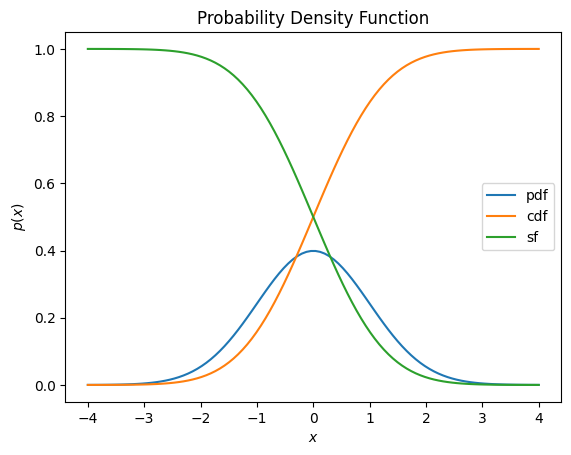

In [7]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.linspace(-4, 4, 100)
pdf = rv.pdf(xx)
cdf = rv.cdf(xx)
ppf = rv.ppf(xx)
isf = rv.isf(xx)
sf = rv.sf(xx)
plt.plot(xx, pdf, label='pdf')
plt.plot(xx, cdf, label='cdf')
# plt.plot(xx, ppf, label='ppf')
# plt.plot(xx, isf, label='isf')
plt.plot(xx, sf, label='sf')
plt.title('Probability Density Function')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend()
plt.show()

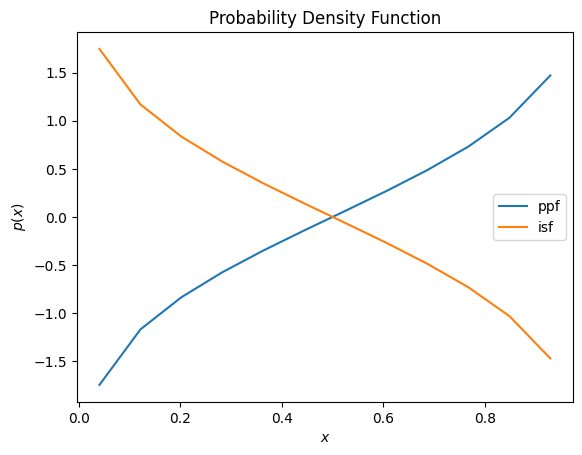

In [8]:
xx = np.linspace(-4, 4, 100)
pdf = rv.pdf(xx)
cdf = rv.cdf(xx)
ppf = rv.ppf(xx)
isf = rv.isf(xx)
sf = rv.sf(xx)
# plt.plot(xx, pdf, label='pdf')
# plt.plot(xx, cdf, label='cdf')
plt.plot(xx, ppf, label='ppf')
plt.plot(xx, isf, label='isf')
# plt.plot(xx, sf, label='sf')
plt.title('Probability Density Function')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend()
plt.show()

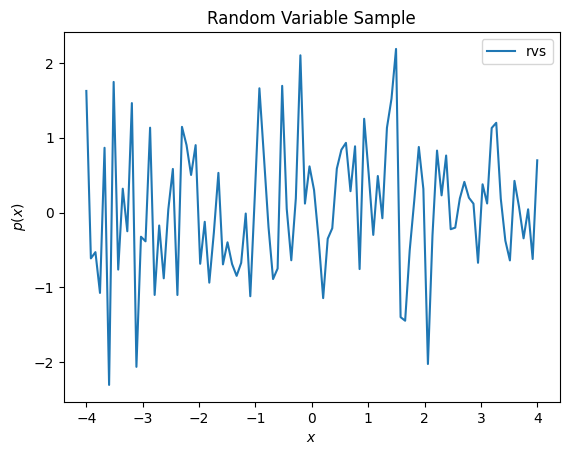

In [9]:
xx = np.linspace(-4, 4, 100)
rvs = rv.rvs(size=100, random_state=1)

plt.plot(xx, rvs, label='rvs')

plt.title('Random Variable Sample')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend()
plt.show()

### 11.2.3 정규분포의 모평균에 대한 검정 : 모분산을 모르는 경우

**1표본 t검정** (`stats.ttest_1samp(sample, p_mean)`): 모분산을 모르는 상황에서 정규분포의 모평균에 대한 검정 수행


In [10]:
t, p_val = stats.ttest_1samp(sample, 130)
print(f't 검정통계량: {t}, p값:{p_val}')

t 검정통계량: -1.4551960206404198, p값:0.16933464230414275


## 11.3 2표본 문제에 관한 가설검정

In [11]:
training_rel = pd.read_csv(DATA_PATH+'ch11_training_rel.csv')
print(training_rel.shape)
training_rel.head(3)

(20, 2)


,전,후
0,59,41
1,52,63
2,55,68


### 11.3.1 대응비교 t검정

In [12]:
t, p_val = stats.ttest_rel(training_rel['후'], training_rel['전'])
print(f't 검정통계량: {t}, p값:{p_val}')
print('p값이 유의수준 0.05 보다 작기에 귀무가설을 기각한다.')

t 검정통계량: 2.204154108716127, p값:0.04004419061842953
p값이 유의수준 0.05 보다 작기에 귀무가설을 기각한다.


### 11.3.2 독립비교 t검정

In [13]:
training_ind = pd.read_csv(DATA_PATH+'ch11_training_ind.csv')
print(training_ind.shape)
training_ind.head(3)

(20, 2)


,A,B
0,47,49
1,50,52
2,37,54


In [14]:
t, p_val = stats.ttest_ind(training_ind['A'], training_ind['B'], equal_var=False) # equal_var=False : 웰치의 방법 (분산이 다른것을 가정)
print(f't 검정통계량: {t}, p값:{p_val}')
print('p값이 유의수준 0.05 보다 크기에 귀무가설을 채택한다.')

t 검정통계량: -1.760815724652471, p값:0.08695731107259361
p값이 유의수준 0.05 보다 크기에 귀무가설을 채택한다.


### 11.3.3 윌콕슨의 부호순위검정

정규분포를 가정할 수 없는 경우, __중앙값 차이__에 대한 검정

In [15]:
toy_df = training_rel[:6].copy()
toy_df.head(3)

,전,후
0,59,41
1,52,63
2,55,68


In [19]:
t, p_val = stats.wilcoxon(training_rel['후'], training_rel['전'])
t1, p_val1 = stats.wilcoxon(training_rel['후'] - training_rel['전']) # 전/후 차이 값을 넣어도 됨
print(f't 검정통계량: {t}, p값:{p_val}')
print(f't 검정통계량: {t1}, p값:{p_val1}')
print('p값이 유의수준 0.05 보다 작기에 귀무가설을 기각한다.')

t 검정통계량: 49.5, p값:0.039989471435546875
t 검정통계량: 49.5, p값:0.039989471435546875
p값이 유의수준 0.05 보다 작기에 귀무가설을 기각한다.


### 11.3.4 만.위트니의 U 검정

대응되는 데이터가 없는 2표본 모집단에 정규분포를 가정할 수 없는 경우, 중앙값 차이에 대한 검정

(윌콕슨의 순위합검정 이라고도 부름)

In [20]:
toy_df = training_ind[:5].copy()
toy_df.head(3)

,A,B
0,47,49
1,50,52
2,37,54


In [22]:
# concatenate : 배열 합치기 (연결)
con = np.concatenate([toy_df['A'], toy_df['B']])
print(f'concatenate result:{con}')
rank = stats.rankdata(con)
print(f'rank result:{rank}')

concatenate result:[47 50 37 60 39 49 52 54 48 51]
rank result:[ 3.  6.  1. 10.  2.  5.  8.  9.  4.  7.]


In [25]:
u, p_val = stats.mannwhitneyu(training_ind['A'], training_ind['B'], alternative='two-sided')
print(f'u 검정통계량: {u}, p값:{p_val}')
if p_val >= 0.05 :
    print('p값이 유의수준 0.05 보다 크기에 귀무가설을 채택한다.')
else :
    print('p값이 유의수준 0.05 보다 작기에 귀무가설을 기각한다.')

u 검정통계량: 130.0, p값:0.05948611166127324
p값이 유의수준 0.05 보다 크기에 귀무가설을 채택한다.
